# How to run a regression?

In [3]:
import pandas as pd
import numpy as np
import urllib
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"  # multiple output per jupyter notebook code block
%matplotlib inline

In [4]:
# urllib.request.urlretrieve(
#     'https://images.aqr.com/-/media/AQR/Documents/Insights/Data-Sets/Quality-Minus-Junk-Factors-Daily.xlsx',
#     'qmj.xlsx')
print('hello')
print(os.getcwd()) 

hello
/Users/Ben/Library/Mobile Documents/com~apple~CloudDocs/同步盘/HKU/Courses/MFIN 7037 Quantitative Trading/lecture1


# Let's read the QMJ factor


In [5]:
x = pd.read_excel(
    'qmj.xlsx',
    sheet_name='QMJ Factors',
    skiprows=18
)

market = pd.read_excel(
    'qmj.xlsx',
    sheet_name='MKT',
    skiprows=18
)

In [7]:
print('hello world')

hello world


In [8]:
x2 = pd.merge(x[['DATE', 'USA']], market[['DATE', 'USA']], on='DATE') # Excel sheet has QMJ data
x2 = x2.rename(columns={'USA_x':'qmj', 'USA_y':'mkt'}) # Market has 

x2.head()

x2['DATE'] = pd.to_datetime(x2['DATE'])

,DATE,qmj,mkt
0,07/01/1957,-0.001566,0.001784
1,07/02/1957,-0.000484,0.008514
2,07/03/1957,0.000869,0.007938
3,07/05/1957,0.001975,0.007755
4,07/08/1957,0.000965,0.003658


In [9]:
np.cumprod([1,2,3,4,5])

array([  1,   2,   6,  24, 120])

In [11]:
x2 = x2.set_index('DATE', drop=False)

x2['cum_ret_mkt'] = (x2['mkt'] + 1).cumprod() - 1
x2['cum_ret_qmj'] = (x2['qmj'] + 1).cumprod() - 1
x2.head()

,DATE,qmj,mkt,cum_ret_mkt,cum_ret_qmj
DATE,,,,,
1957-07-01,1957-07-01,-0.001566,0.001784,0.001784,-0.001566
1957-07-02,1957-07-02,-0.000484,0.008514,0.010313,-0.002049
1957-07-03,1957-07-03,0.000869,0.007938,0.018333,-0.001182
1957-07-05,1957-07-05,0.001975,0.007755,0.026231,0.000791
1957-07-08,1957-07-08,0.000965,0.003658,0.029985,0.001757


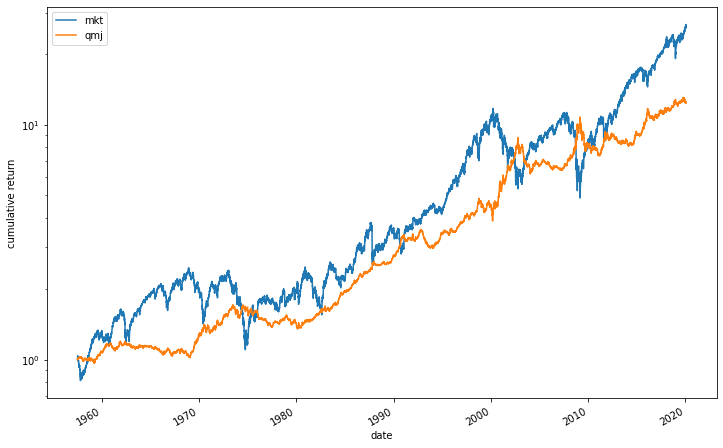

In [12]:
plt.rcParams["figure.figsize"] = (12,8)
ax = (
    x2
    .assign(date=x2['DATE'], mkt=x2['cum_ret_mkt']+1, qmj=x2['cum_ret_qmj']+1)
    .plot(x='date', y=['mkt', 'qmj'], logy=True)
).set_ylabel('cumulative return')


# Underperforms the market in absolute return

# But clearly smoother
* sharpe ratio?
* but ... is it correlated with the market? diversification benefits?


In [23]:
{
    'Sharpe MKT': x2['mkt'].mean() / x2['mkt'].std() * 255**0.5,
    'Sharpe QMJ': x2['qmj'].mean() / x2['qmj'].std() * 255**0.5
}

{'Sharpe MKT': 0.41714780189609474, 'Sharpe QMJ': 0.6714456894831614}

In [13]:
smf.ols('qmj ~ mkt', data=x2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    qmj   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4080.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:21:28   Log-Likelihood:                 68140.
No. Observations:               16074   AIC:                        -1.363e+05
Df Residuals:                   16072   BIC:                        -1.363e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002   2.75e-05      7.635      0.000       0.000       0.000
mkt           -0.1857      0.003    -63.871      0.000      -0.191      -0.180
==============================================================================
Omnibus:                     2579.725   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47918.220
Skew:                           0.126   Prob(JB):                         0.00
Kurtosis:                      11.455   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
olsm=smf.ols('qmj ~ mkt', data=x2).fit()

In [44]:
import sklearn.metrics as metrics
r2=metrics.r2_score(x2['qmj'],olsm.fittedvalues)
rho=np.sqrt(r2)
print(rho)

0.4499378923839715


In [18]:
dir(olsm.summary())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_repr_html_',
 'add_extra_txt',
 'add_table_2cols',
 'add_table_params',
 'as_csv',
 'as_html',
 'as_latex',
 'as_text',
 'extra_txt',
 'tables']

In [29]:
print(olsm.summary())

                            OLS Regression Results                            
Dep. Variable:                    qmj   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     4080.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:29:09   Log-Likelihood:                 68140.
No. Observations:               16074   AIC:                        -1.363e+05
Df Residuals:                   16072   BIC:                        -1.363e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0002   2.75e-05      7.635      0.0

# What did we learn?
* sharpe ratio is higher
* it is a negative $\beta$ strategy. ON average, when the market goes up by 1%, QMJ does down by .18%

* QMJ has positive $\alpha$ with respect to market
    * it is very significant
* Therefore, a $\beta$ neutral strategy e.g. short market by .18cents for every dollar invested in QMJ will earn, on average, .02 basis points per day or 5.4 % per year

* Because they are diversified and one has alpha with respect to another strategy, a blend should give diversification benefits and a higher Sharpe ratio


In [16]:
{
    'Sharpe 1/2 QMJ + 1/2 MKT': ((x2['mkt']+x2['qmj'])/2).mean() / ((x2['mkt']+x2['qmj'])/2).std() * 255**0.5,
    'Sharpe MKT': x2['mkt'].mean() / x2['mkt'].std() * 255**0.5,
    'Sharpe QMJ': x2['qmj'].mean() / x2['qmj'].std() * 255**0.5
}

{'Sharpe 1/2 QMJ + 1/2 MKT': 0.776779377105961,
 'Sharpe MKT': 0.41714780189609474,
 'Sharpe QMJ': 0.6714456894831614}

In [30]:
x2['halfsies'] = (x2['mkt']+x2['qmj'])/2

In [31]:
smf.ols('halfsies ~ mkt + qmj', data=x2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               halfsies   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.411e+31
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:32:51   Log-Likelihood:             5.7632e+05
No. Observations:               16074   AIC:                        -1.153e+06
Df Residuals:                   16071   BIC:                        -1.153e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.487e-17   5.13e-19    126.389      0.000    6.39e-17    6.59e-17
mkt            0.5000   6.06e-17   8.25e+15      0.000       0.500       0.500
qmj            0.5000   1.47e-16   3.41e+15      0.000       0.500       0.500
==============================================================================
Omnibus:                     4146.443   Durbin-Watson:                   0.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249361.486
Skew:                          -0.337   Prob(JB):                         0.00
Kurtosis:                      22.284   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

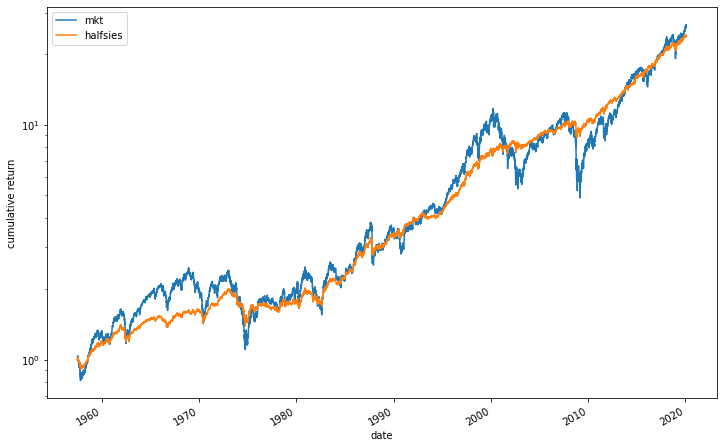

In [22]:
x2['cum_halfsies'] = (x2['halfsies'] + 1).cumprod() - 1


plt.rcParams["figure.figsize"] = (12,8)

ax = (
    x2
    .assign(date=x2['DATE'], mkt=x2['cum_ret_mkt']+1, halfsies=x2['cum_halfsies']+1)
    .plot(x='date', y=['mkt', 'halfsies'], logy=True)
).set_ylabel('cumulative return')